In [4]:
#데이터처리 라이브러리
import pandas as pd
import numpy as np
#머신러닝
from sklearn import tree
from sklearn import ensemble

In [5]:
from sklearn import tree
from sklearn import ensemble

In [6]:
ensemble.RandomForestRegressor

sklearn.ensemble._forest.RandomForestRegressor

In [7]:
tree.DecisionTreeRegressor

sklearn.tree._classes.DecisionTreeRegressor

In [8]:
featuresData = pd.read_csv("../dataset/feature_regression_example.csv")

In [9]:
#A. 데이터 전처리
#타입통합

In [10]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155
...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361


In [11]:
featuresData.describe()

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,201576.276190,2015.495238,26.752381,1210.238095,2.742857,0.205780
std,52.254278,0.502375,15.229514,820.097819,1.587382,0.128636
min,201501.000000,2015.000000,1.000000,15.000000,0.000000,0.000000
25%,201527.000000,2015.000000,14.000000,542.000000,1.000000,0.208155
50%,201553.000000,2015.000000,27.000000,1139.000000,4.000000,0.209442
75%,201626.000000,2016.000000,40.000000,1753.000000,4.000000,0.280258
max,201652.000000,2016.000000,53.000000,4035.000000,4.000000,0.421888


In [12]:
featuresData.head(1)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442


In [13]:
###np.where 활용포인트 : 변환 대상이 적을경우
###변환대상이 5개 정도될경우 MAP 함수를 써보는것도 괜찮다


In [14]:
ynMap={"Y":1,"N":2}

In [15]:
featuresData["HOLIDAY_YNMAP"] = featuresData.PROMOTION.map(ynMap)

##변환대상이100?

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
ynLabelEn = LabelEncoder()

In [18]:
ynLabelEn.fit_transform(featuresData["HOLIDAY"])

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [19]:
csData = pd.read_csv("../dataset/customerdata.csv")

In [20]:
ynLabelEn.fit_transform(csData["CUSTID"])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [21]:
###A-2 특성 선정 / 데이터 분리

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
featuresData.corr()

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HOLIDAY_YNMAP
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,-0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,-0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,-0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,-0.898554
HOLIDAY_YNMAP,-0.205916,-0.195931,-0.060206,-0.612451,0.374072,-0.898554,1.000000


<Figure size 500x300 with 0 Axes>

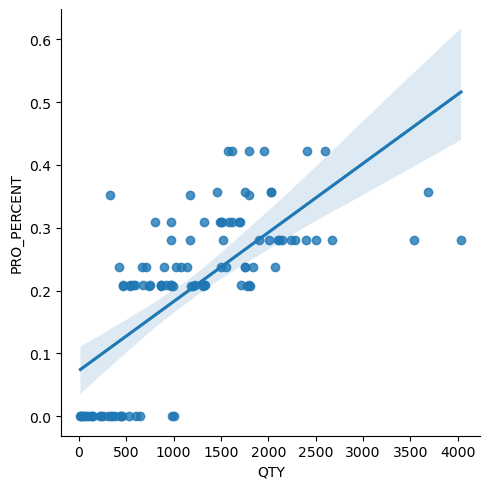

In [24]:
plt.figure(figsize=(5,3))
sns.lmplot(data=featuresData, x="QTY",y="PRO_PERCENT")


In [25]:
corrDf = featuresData.corr()

In [26]:
qtyCorr = corrDf.loc[:,["QTY"]].sort_values(by=["QTY"], ascending=False)

<AxesSubplot:>

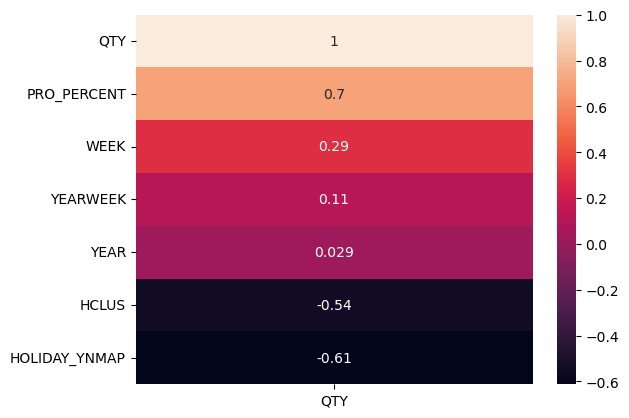

In [27]:
sns.heatmap(qtyCorr,annot=True)

In [28]:
featuresData.shape

(105, 13)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
trData,tdData = train_test_split(featuresData,test_size=0.2)
trData



,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HOLIDAY_YNMAP
90,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,1
82,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201630,2016,30,2240,N,4,Y,0.280258,1
47,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201548,2015,48,3691,Y,0,Y,0.357511,1
31,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201532,2015,32,256,N,4,N,0.000000,2
68,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201616,2016,16,588,N,4,Y,0.209442,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201526,2015,26,2505,Y,1,Y,0.280258,1
13,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201514,2015,14,466,N,4,Y,0.208155,1
17,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201518,2015,18,526,N,4,N,0.000000,2
30,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201531,2015,31,439,N,4,N,0.000000,2


###b-3

In [39]:
from sklearn.tree import plot_tree

In [40]:
import matplotlib.pyplot as plt

###c-4예측

In [ ]:
dtModel.predict

In [ ]:
%matplotlib inline

In [1]:
from sklearn.tree import plot_tree

In [ ]:
featuresData["REGIONID"] = featuresData["REGIONID"].astype(str)
featuresData["PRODUCTGROUP"] = featuresData["PRODUCTGROUP"].astype(str)

In [ ]:
featuresData["PROMOTION_LB"]=np.where(featuresData.PROMOTION == "Y",1,0)
featuresData["HOLIDAY_LB"]=np.where(featuresData.HOLIDAY == "Y",1,0)

In [ ]:
featuresData.head(1)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442


In [ ]:
featuresData.loc[(featuresData.PROMOTION_LB=="0")&
                (featuresData.PROMOTION =="N")]

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTION_LB,HOLIDAY_LB


In [ ]:
featuresData.corr()

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,PROMOTION_LB,HOLIDAY_LB
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.205916,0.049867
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,0.195931,-0.031106
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.060206,0.273710
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.612451,0.505932
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.374072,-0.974601
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.898554,0.487062
PROMOTION_LB,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,1.000000,0.365148
HOLIDAY_LB,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,0.365148,1.000000


In [ ]:
#특정선정/데이터분리
corrDf = featuresData.corr()
stdCorr = 0.5

In [ ]:
corrDf.loc[(abs(corrDf.QTY) >= stdCorr) & (corrDf.QTY != 1)].index

Index(['HCLUS', 'PRO_PERCENT', 'PROMOTION_LB', 'HOLIDAY_LB'], dtype='object')

In [ ]:
label =["QTY"]

In [ ]:
stdRatio = 0.7

In [ ]:
StdIndexIdex= int(featuresData.shape[0] * stdRatio)

In [ ]:
trainingDataFeatures = trainingDataFeatures.loc[0:StdIndexIdex,features]
trainingDataLabel = trainingDataLabel.loc[0:StdIndexIdex,features]
trainingData = featuresData.loc[0:StdIndexIdex,:]
testData = featuresData.loc[StdIndexIdex+1:,:]

In [ ]:
print(trainingData.shape)
print(testData.shape)

(74, 14)
(31, 14)


In [ ]:
#B 모델적용
#b-3

In [ ]:
from sklearn import tree

In [ ]:
dtModel = tree.DecisionTreeRegressor(random_state=10)

In [ ]:
dtModel.fit(X=trainingDataFeatures,
            y=trainingDataLabel)

In [ ]:
#C예측

In [ ]:
predictValue = dtModel.predict(X = testDataFeatures)

In [ ]:
len(predictValue)

In [ ]:
#미래는어떻게예측

In [ ]:
features

In [ ]:
inputHlus=1
inputProPercent=0.5
inputPromotionLb=1
inputHlb=1

In [ ]:
testData = pd.DataFrame([[inputHlus,inputProPercent,inputPromotionLb,inputHlb]])